Komoditas Kakao 2014

In [75]:
# import lib
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np

In [76]:
# read the dataset
df = pd.read_excel("./datamaster.xlsx", sheet_name="2014")
# Show dataset
df

,No,Provinsi,Luas_Areal_2014,Produktiv_2014,Produksi_2014,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,1.0,Aceh,1.016501e+05,683.0,28015.088000,128989.0,101576.0,NaN,74.0,32199.0,41040.0,28411.0
1,2.0,Sumatera Utara,6.563900e+04,740.0,19379.754463,65423.0,63243.0,270.0,2126.0,34898.0,26192.0,4549.0
2,3.0,Sumatera Barat,1.569977e+05,816.0,56675.045928,119631.0,155241.0,NaN,1757.0,69520.0,69467.0,18010.0
3,4.0,Riau,7.156440e+03,695.0,2952.473503,14075.0,4407.0,NaN,2749.0,1497.0,4250.0,1409.0
4,5.0,Kepulauan Riau,5.000000e+00,333.0,0.753441,97.0,5.0,NaN,NaN,2.0,2.0,1.0
5,6.0,Jambi,2.220000e+03,583.0,485.969132,5751.0,2220.0,NaN,NaN,861.0,833.0,526.0
6,7.0,Sumatera Selatan,1.045469e+04,791.0,3118.324533,12528.0,10455.0,NaN,NaN,5106.0,3943.0,1406.0
7,8.0,Kepulauan Bangka Belitung,7.098800e+02,477.0,116.666781,648.0,710.0,NaN,NaN,331.0,244.0,135.0
8,9.0,Bengkulu,1.342100e+04,728.0,4615.576593,20633.0,13421.0,NaN,NaN,3954.0,6343.0,3124.0
9,10.0,Lampung,7.203200e+04,801.0,34689.488111,118331.0,71404.0,20.0,608.0,13984.0,43287.0,14761.0


In [77]:
#  Drop data line 10 and 34 = 10 jakarta yang tidak memiliki komoditas kakao, 34 Indonesia bukan provinsi
df = df.drop([10, 34])
# buang kolom No dan Provinsi karena tidak relevan dengan analisis
df = df.drop(['No', 'Provinsi'], axis=1)
# Show dataset
df

,Luas_Areal_2014,Produktiv_2014,Produksi_2014,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101650.060000,683.0,28015.088000,128989.0,101576.0,NaN,74.0,32199.0,41040.0,28411.0
1,65639.000000,740.0,19379.754463,65423.0,63243.0,270.0,2126.0,34898.0,26192.0,4549.0
2,156997.700000,816.0,56675.045928,119631.0,155241.0,NaN,1757.0,69520.0,69467.0,18010.0
3,7156.440000,695.0,2952.473503,14075.0,4407.0,NaN,2749.0,1497.0,4250.0,1409.0
4,5.000000,333.0,0.753441,97.0,5.0,NaN,NaN,2.0,2.0,1.0
5,2220.000000,583.0,485.969132,5751.0,2220.0,NaN,NaN,861.0,833.0,526.0
6,10454.690000,791.0,3118.324533,12528.0,10455.0,NaN,NaN,5106.0,3943.0,1406.0
7,709.880000,477.0,116.666781,648.0,710.0,NaN,NaN,331.0,244.0,135.0
8,13421.000000,728.0,4615.576593,20633.0,13421.0,NaN,NaN,3954.0,6343.0,3124.0
9,72032.000000,801.0,34689.488111,118331.0,71404.0,20.0,608.0,13984.0,43287.0,14761.0


In [78]:
df = df.fillna(df.mean()) # Nilai missing value diisi dengan rata-rata
# df = df.fillna(df.min()) # Nilai missing value diisi dengan nilai minimum
# df = df.fillna(df.max()) # Nilai missing value diisi dengan nilai maximum
# df = df.dropna() # Drop baris yang masih ada missing value

df

,Luas_Areal_2014,Produktiv_2014,Produksi_2014,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101650.060000,683.0,28015.088000,128989.0,101576.0,1896.375,74.0,32199.0,41040.0,28411.0
1,65639.000000,740.0,19379.754463,65423.0,63243.0,270.000,2126.0,34898.0,26192.0,4549.0
2,156997.700000,816.0,56675.045928,119631.0,155241.0,1896.375,1757.0,69520.0,69467.0,18010.0
3,7156.440000,695.0,2952.473503,14075.0,4407.0,1896.375,2749.0,1497.0,4250.0,1409.0
4,5.000000,333.0,0.753441,97.0,5.0,1896.375,1739.2,2.0,2.0,1.0
5,2220.000000,583.0,485.969132,5751.0,2220.0,1896.375,1739.2,861.0,833.0,526.0
6,10454.690000,791.0,3118.324533,12528.0,10455.0,1896.375,1739.2,5106.0,3943.0,1406.0
7,709.880000,477.0,116.666781,648.0,710.0,1896.375,1739.2,331.0,244.0,135.0
8,13421.000000,728.0,4615.576593,20633.0,13421.0,1896.375,1739.2,3954.0,6343.0,3124.0
9,72032.000000,801.0,34689.488111,118331.0,71404.0,20.000,608.0,13984.0,43287.0,14761.0


In [79]:
# rubah semua kolom ke int64 agar bisa diolah menggunakan algoritma KMeans
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 33
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Luas_Areal_2014              33 non-null     int64
 1   Produktiv_2014               33 non-null     int64
 2   Produksi_2014                33 non-null     int64
 3   Jumlah_Petani                33 non-null     int64
 4   Areal_Perkebunan_Rakyat      33 non-null     int64
 5   Areal_Perkebunan_Pemerintah  33 non-null     int64
 6   Areal_Perkebunan_Swasta      33 non-null     int64
 7   Tanaman_Imature              33 non-null     int64
 8   Tanaman_Mature               33 non-null     int64
 9   Tanaman_Damage               33 non-null     int64
dtypes: int64(10)
memory usage: 2.8 KB


In [80]:
# Final dataset siap diolah menggunakan algoritma KMeans
df

,Luas_Areal_2014,Produktiv_2014,Produksi_2014,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage
0,101650,683,28015,128989,101576,1896,74,32199,41040,28411
1,65639,740,19379,65423,63243,270,2126,34898,26192,4549
2,156997,816,56675,119631,155241,1896,1757,69520,69467,18010
3,7156,695,2952,14075,4407,1896,2749,1497,4250,1409
4,5,333,0,97,5,1896,1739,2,2,1
5,2220,583,485,5751,2220,1896,1739,861,833,526
6,10454,791,3118,12528,10455,1896,1739,5106,3943,1406
7,709,477,116,648,710,1896,1739,331,244,135
8,13421,728,4615,20633,13421,1896,1739,3954,6343,3124
9,72032,801,34689,118331,71404,20,608,13984,43287,14761


In [81]:
x_train = df[['Luas_Areal_2014','Produktiv_2014','Produksi_2014','Jumlah_Petani','Areal_Perkebunan_Rakyat','Areal_Perkebunan_Pemerintah','Areal_Perkebunan_Swasta','Tanaman_Imature','Tanaman_Mature','Tanaman_Damage']].values
x_train

array([[101650,    683,  28015, 128989, 101576,   1896,     74,  32199,
         41040,  28411],
       [ 65639,    740,  19379,  65423,  63243,    270,   2126,  34898,
         26192,   4549],
       [156997,    816,  56675, 119631, 155241,   1896,   1757,  69520,
         69467,  18010],
       [  7156,    695,   2952,  14075,   4407,   1896,   2749,   1497,
          4250,   1409],
       [     5,    333,      0,     97,      5,   1896,   1739,      2,
             2,      1],
       [  2220,    583,    485,   5751,   2220,   1896,   1739,    861,
           833,    526],
       [ 10454,    791,   3118,  12528,  10455,   1896,   1739,   5106,
          3943,   1406],
       [   709,    477,    116,    648,    710,   1896,   1739,    331,
           244,    135],
       [ 13421,    728,   4615,  20633,  13421,   1896,   1739,   3954,
          6343,   3124],
       [ 72032,    801,  34689, 118331,  71404,     20,    608,  13984,
         43287,  14761],
       [  9546,    514,   2509

In [82]:
# Normalisasi data agar semua kolom memiliki range nilai yang sama tidak jomplang yang akan mempengaruhi hasil clustering
#  Standar Scaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1
# (x - mean(x)) / std(x) = (x - u) / s  (u = mean(x), s = std(x)) 
# (x = nilai data, mean(x) = rata-rata, std(x) = standar deviasi)  (u = nilai rata-rata, s = nilai standar deviasi)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)
# df_scaled

# MinMaxScaler adalah salah satu metode normalisasi data yang paling sering digunakan untuk mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# (x - min(x)) / (max(x) - min(x)) = (x - a) / (b - a)  (a = min(x), b = max(x))
# (x = nilai data, min(x) = nilai minimum, max(x) = nilai maksimum)  (a = nilai minimum, b = nilai maksimum)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x_train)
df_scaled

# Perbedaan antara Standard Scaler dan MinMax Scaler adalah Standard Scaler mengubah data menjadi distribusi normal dengan mean = 0 dan standard deviation = 1 sedangkan MinMax Scaler mengubah data menjadi distribusi normal dengan nilai minimum = 0 dan nilai maksimum = 1
# Standard Scaler lebih cocok digunakan untuk data yang memiliki distribusi normal sedangkan MinMax Scaler lebih cocok digunakan untuk data yang memiliki distribusi tidak normal contohnya data yang memiliki nilai outlier yang sangat besar atau sangat kecil sehingga mengganggu distribusi normal data tersebut sehingga perlu dilakukan normalisasi data dengan MinMax Scaler agar nilai outlier tersebut tidak terlalu mempengaruhi hasil clustering, sedangkan Standard Scaler tidak cocok digunakan untuk data yang memiliki nilai outlier yang sangat besar atau sangat kecil karena nilai outlier tersebut akan sangat mempengaruhi hasil clustering sehingga hasil clustering tidak akurat lagi.

array([[3.48763399e-01, 6.33550489e-01, 1.73501870e-01, 4.62761374e-01,
        3.48514274e-01, 1.53571138e-01, 1.40112090e-02, 4.63146236e-01,
        2.30900805e-01, 3.78351023e-01],
       [2.25202783e-01, 7.26384365e-01, 1.20017589e-01, 2.34540154e-01,
        2.16984628e-01, 2.14512066e-02, 4.24739792e-01, 5.01970713e-01,
        1.47358353e-01, 6.05681258e-02],
       [5.38669521e-01, 8.50162866e-01, 3.50998340e-01, 4.29163316e-01,
        5.32651661e-01, 1.53571138e-01, 3.50880705e-01, 1.00000000e+00,
        3.90845665e-01, 2.39835395e-01],
       [2.45364461e-02, 6.53094463e-01, 1.82822603e-02, 5.01852597e-02,
        1.51043096e-02, 1.53571138e-01, 5.49439552e-01, 2.15052217e-02,
        2.39014235e-02, 1.87510820e-02],
       [0.00000000e+00, 6.35179153e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.53571138e-01, 3.47277822e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.60008784e-03, 4.70684039e-01, 3.00369113e-03, 2.02995749e-02,
   

DBScan Clustering

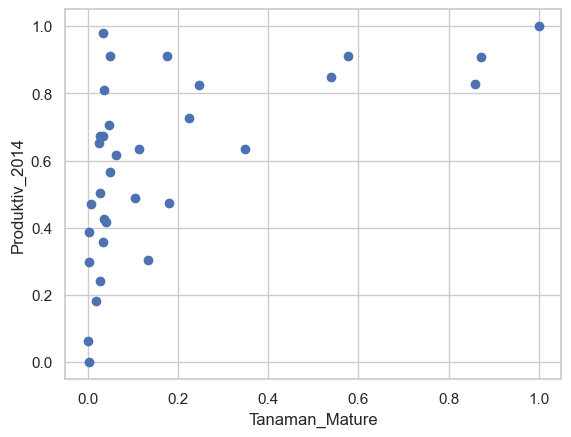

In [83]:
# import plt
import matplotlib.pyplot as plt

plt.scatter(df_scaled[:,0], df_scaled[:,1])
plt.xlabel('Tanaman_Mature')
plt.ylabel('Produktiv_2014')
plt.show()

In [84]:
# DBScan Clustering
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.62, min_samples=5)
dbscan.fit(df_scaled)

# Show cluster labels
dbscan.labels_

# eps adalah jarak maksimum antara 2 titik yang dapat dikatakan sebagai satu cluster (eps = 2)
# min_samples adalah jumlah minimum titik yang harus ada dalam satu cluster (min_samples = 5)
# eps dan min_samples adalah parameter yang harus ditentukan sebelum melakukan clustering

# apakah ada evaluasi untuk nilai eps dan min_samples yang optimal ? 
# jawabannya adalah tidak, karena nilai eps dan min_samples harus ditentukan berdasarkan analisis data dan pengetahuan domain yang dimiliki oleh data scientist

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0],
      dtype=int64)

In [85]:
# menampilkan jumlah cluster
len(set(dbscan.labels_))

2

In [86]:
# Menambahkan kolom cluster ke dalam dataset
df['cluster'] = dbscan.labels_
df

,Luas_Areal_2014,Produktiv_2014,Produksi_2014,Jumlah_Petani,Areal_Perkebunan_Rakyat,Areal_Perkebunan_Pemerintah,Areal_Perkebunan_Swasta,Tanaman_Imature,Tanaman_Mature,Tanaman_Damage,cluster
0,101650,683,28015,128989,101576,1896,74,32199,41040,28411,0
1,65639,740,19379,65423,63243,270,2126,34898,26192,4549,0
2,156997,816,56675,119631,155241,1896,1757,69520,69467,18010,-1
3,7156,695,2952,14075,4407,1896,2749,1497,4250,1409,0
4,5,333,0,97,5,1896,1739,2,2,1,0
5,2220,583,485,5751,2220,1896,1739,861,833,526,0
6,10454,791,3118,12528,10455,1896,1739,5106,3943,1406,0
7,709,477,116,648,710,1896,1739,331,244,135,0
8,13421,728,4615,20633,13421,1896,1739,3954,6343,3124,0
9,72032,801,34689,118331,71404,20,608,13984,43287,14761,0


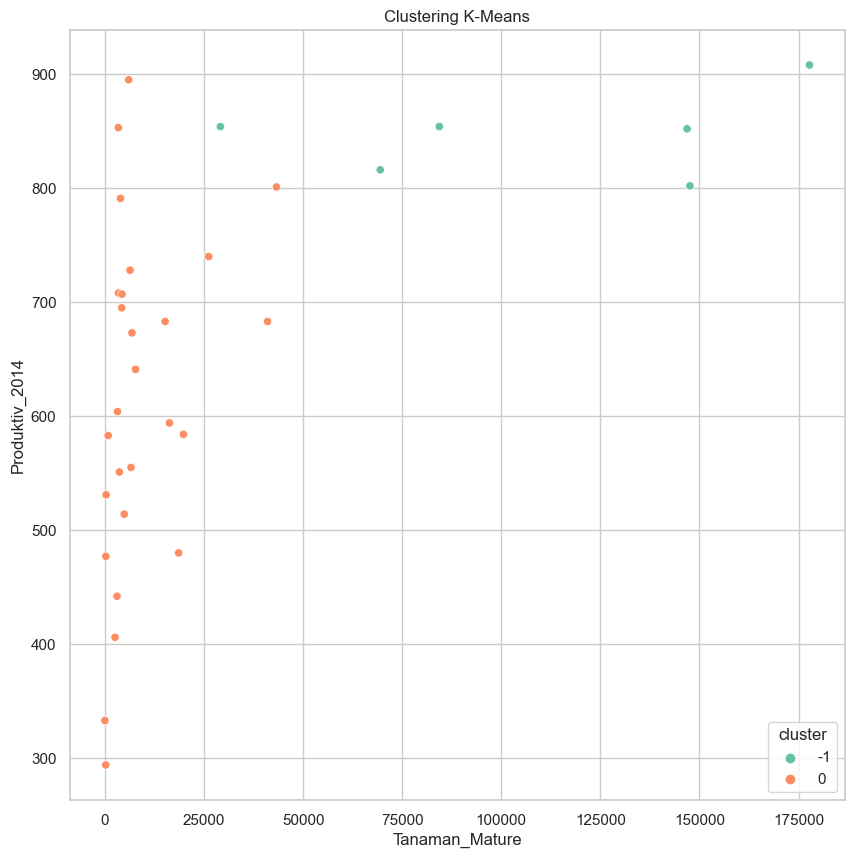

In [87]:
# visualisasi hasil clustering
# plt.scatter(df_scaled[:,0], df_scaled[:,1], c=dbscan.labels_)
# plt.xlabel('Tanaman_Mature')
# plt.ylabel('Produktiv_2014')
# plt.show()

# plot data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.scatterplot(x="Tanaman_Mature", y="Produktiv_2014", hue="cluster", data=df, palette="Set2")
plt.title("Clustering K-Means")
plt.show()

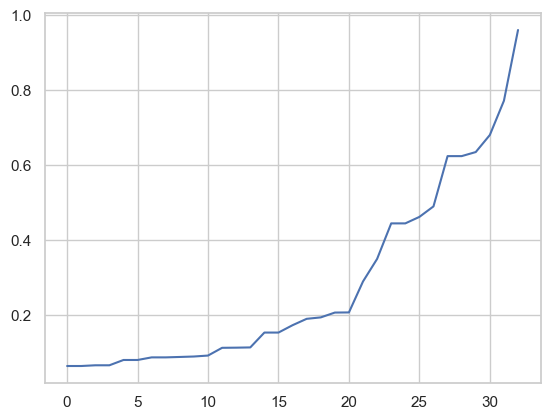

In [88]:
# optimal eps and min_samples
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


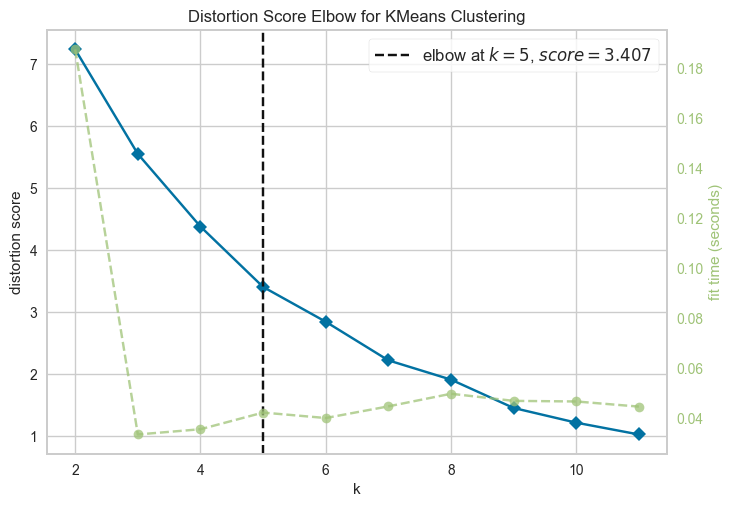

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
# how to find optimal eps and min_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(df_scaled)
visualizer.poof()

In [91]:
# Silhouette Coefficient (SC) is a measure of cluster cohesion and separation. 
# The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# The silhouette ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
# If most objects have a high value, then the clustering configuration is appropriate.
# If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
from sklearn.metrics import silhouette_score
silhouette_score(df_scaled, dbscan.labels_)

0.6104995354876307

In [92]:
# Davies-Bouldin Index (DBI) is a measure of how well a clustering solution
#  represents the data and is defined as the average similarity measure of each cluster with its most similar cluster,
#  where similarity is the ratio of within-cluster distances to between-cluster distances.
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_scaled, dbscan.labels_)

0.7548344616129805